# Neural Networks

### Sigmoid Function

Most commonly used activation function is the sigmoid function. By introducing a non-linear function, this allows the neural network to learn things outside of just linear combination of inputs (by mapping linear inputs to non-linear outputs). Sigmoid function also has desirable properties such as being continuous and differentiable, bounded between 0 and 1, and being easy to compute the derivative. 

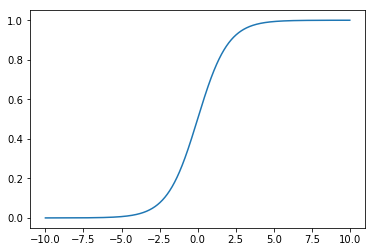

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization
x = np.linspace(-10,10,1000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

# Functions
def sig(z):
    return 1/(1+np.exp(-z))

def sigprime(z):
    return z*(1-z)
        

### Training Data

Here is the training dataset. It is in the form of a matrix so that each row represents an input/output. This is called batch training because we pass in many examples at a time. Apparently, online training is better (passing in one example at a time) than batch training when using back-propogation but I am not sure why.

In [2]:
t_x = np.array([
[0,0,1],
[0,1,1],
[1,0,1],
[1,1,1]])

t_y = np.array([[
0,
0,
1,
1]]).T

The algorithm for training neural networks is generally straightforward. A two layer neural network just consists of the input layer and the output layer (with synapses in-between). 

1) You initialize the weights with random values.

2) You feed the neural network some information and let it try to 'predict' the output.

3) Then you compute how off the predicted output was from the expected output and adjust the weights.

4) Repeat steps 2) and 3) until the neural network is 'smart' enough

###  Two Layer Neural Network

In [5]:
np.random.seed(1)
# initialize weights randomly with mean 0
w0 = 2*np.random.random((3,1)) - 1 

for i in range(50000):
    # appply sigmoid function to weighted sum of inputs
    layer0 = t_x
    layer1 = sig(np.dot(layer0, w0))
    
    delta = (t_y - layer1) * sigprime(layer1)
    w0 += np.dot(layer0.T, delta)
    
print("Output after training: ")
print(layer1)

Output after training: 
[[ 0.0042779 ]
 [ 0.00348742]
 [ 0.99715469]
 [ 0.99650925]]


### Three Layer Neural Network

In [6]:
np.random.seed(1)
# initialize weights randomly with mean 0
# dim(w0) is 3 by 4
# dim(w1) is 4 by 1
w0 = 2*np.random.random((3,4)) - 1 
w1 = 2*np.random.random((4,1)) - 1

for i in range(50000):
    # appply sigmoid function to weighted sum of inputs
    layer0 = t_x
    layer1 = sig(np.dot(layer0, w0))
    layer2 = sig(np.dot(layer1, w1))
    
    # in what direction were we off
    delta2 = (t_y - layer2) * sigprime(layer2)
    
    # backpropogate
    # note that we use delta2 and multiply that by w1
    delta1 = np.dot(delta2, w1.T) * sigprime(layer1)
    
    w1 += np.dot(layer1.T, delta2)
    w0 += np.dot(layer0.T, delta1)
    
print("Output after training: ")
print(layer2)

Output after training: 
[[ 0.00216948]
 [ 0.00179787]
 [ 0.99784669]
 [ 0.99760503]]
